In [6]:
import pandas as pd

data = pd.read_csv("data.csv")

data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [15]:

data['SalePrice'] = data['SalePrice'].fillna(
  data['SalePrice'].mean())

data = data.dropna()


In [19]:
from sklearn.model_selection import train_test_split

analytic_fields = ['LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[analytic_fields],
                                                 data['SalePrice'], train_size = 0.8, test_size=0.2, random_state=0)


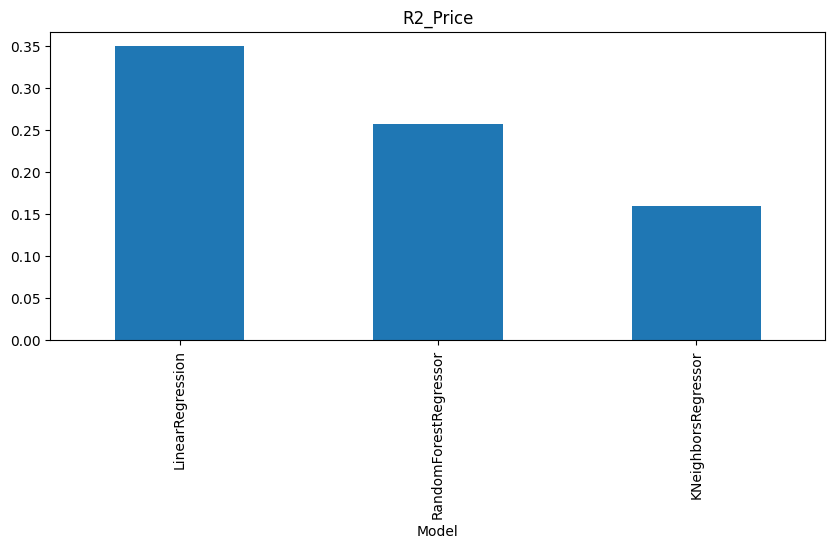

In [25]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

models = [ LinearRegression(),
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),
          KNeighborsRegressor(n_neighbors=6)
          ]

TestModels = []

for model in models:
    tmp = {'Model': None}  # Initialize with a default value
    # Get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    # Fit model on training dataset
    model.fit(Xtrain, Ytrain)
    # Predict prices for test dataset and calculate r^2 score
    tmp['R2_Price'] = r2_score(Ytest, model.predict(Xtest))
    # Append obtained data
    TestModels.append(tmp)

# Convert list of dictionaries into DataFrame
TestModels = pd.DataFrame(TestModels)
TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(10,4))
TestModels.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')

plt.show()


